In [1]:
import torch
from torchvision import datasets, transforms
import os
import sys

sys.path.append('../')
from dataSetCombiner import getDataSet

path = r"C:\Users\Dennis\Desktop\Pro\AITest\imgGen\Data"

dataset = getDataSet(path, "FreePBR", 1024, 1024, False, 1)
dataset_len = len(dataset)
print(dataset_len)


263


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
import torch

rgb_values = []

percentage = 50

i = 0

for data, _ in dataset:

    # image = np.transpose(data, (1, 2, 0))
    # plt.figure(figsize=(6, 6))
    # plt.imshow(image)
    # plt.axis('off')  # Turn off axis numbers and ticks
    # plt.show()

    reshaped_tensor = data.view(3, -1).t()
    indices = np.random.choice(reshaped_tensor.shape[0], size=(reshaped_tensor.shape[0] * percentage) // 100, replace=False)
    selected_rgb_values = reshaped_tensor[indices]
    rgb_values.extend(selected_rgb_values.tolist())

    i += 1
    if i % 100 == 0:
        print(f"{i}/{dataset_len}")
    #     break

# rgb_values_array = np.array(rgb_values)

100/263
200/263


In [25]:
rgb_values_array255 = np.array(rgb_values * 255).astype(int)

unique_colors, counts = np.unique(rgb_values_array255, axis=0, return_counts=True)
print(f"Anzahl der Farben: {len(unique_colors)}")
for color, count in zip(unique_colors, counts):
    print(f"Farbe: {color}, Anzahl: {count}")

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color 

def toLAB(rgb_values_array, title):
    lab_values_array = color.rgb2lab(rgb_values_array.reshape((1, -1, 3)))

    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    colors = rgb_values_array.reshape((-1, 3))
    ax.scatter(xs=lab_values_array[:, :, 2].flatten(), 
               ys=lab_values_array[:, :, 1].flatten(), 
               zs=lab_values_array[:, :, 0].flatten(), 
               s=10, c=colors, lw=0)
    
    ax.set_xlabel('A', fontsize=9)
    ax.set_ylabel('B', fontsize=9)
    ax.set_zlabel('L', fontsize=9)
    ax.set_xlim(-200, 200)
    ax.set_ylim(-200, 200)
    ax.set_zlim(0, 100) 

    ax.tick_params(axis='x', labelsize=9)
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='z', labelsize=9)

    plt.title(title, pad=20)
    plt.show()

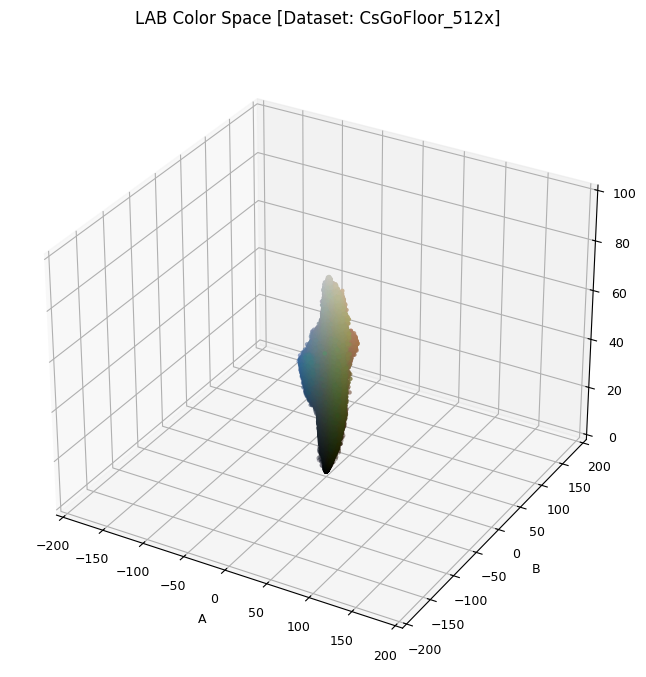

In [94]:
toLAB(rgb_values_array, 'LAB Color Space [Dataset: CsGoFloor_512x]')

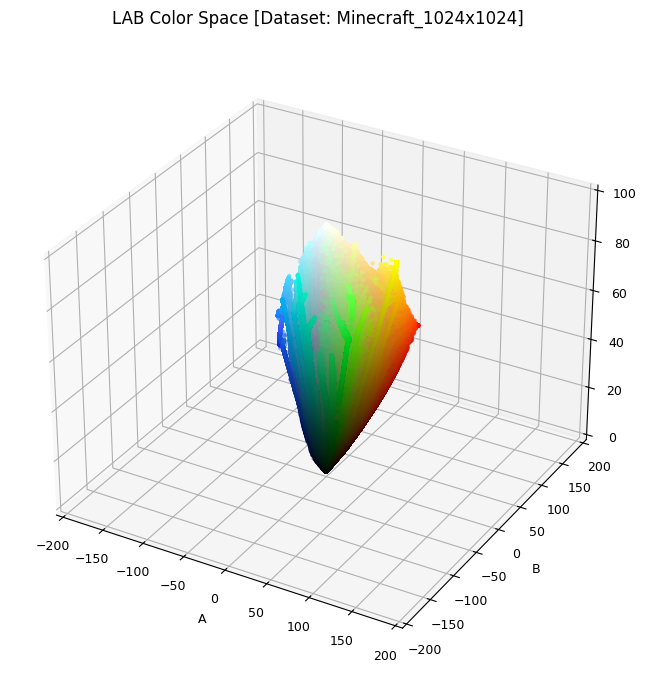

In [90]:
toLAB(rgb_values_array, 'LAB Color Space [Dataset: Minecraft_1024x1024]')

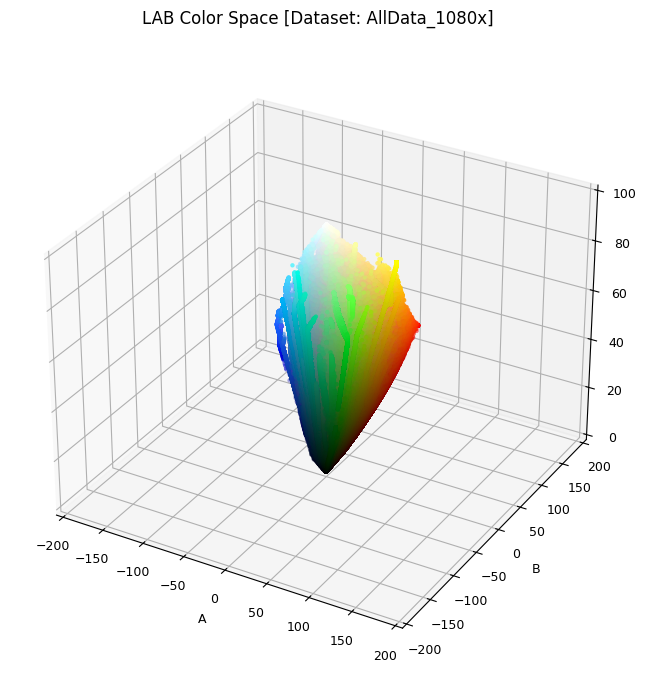

In [87]:
toLAB(rgb_values_array, 'LAB Color Space [Dataset: AllData_1080x]')

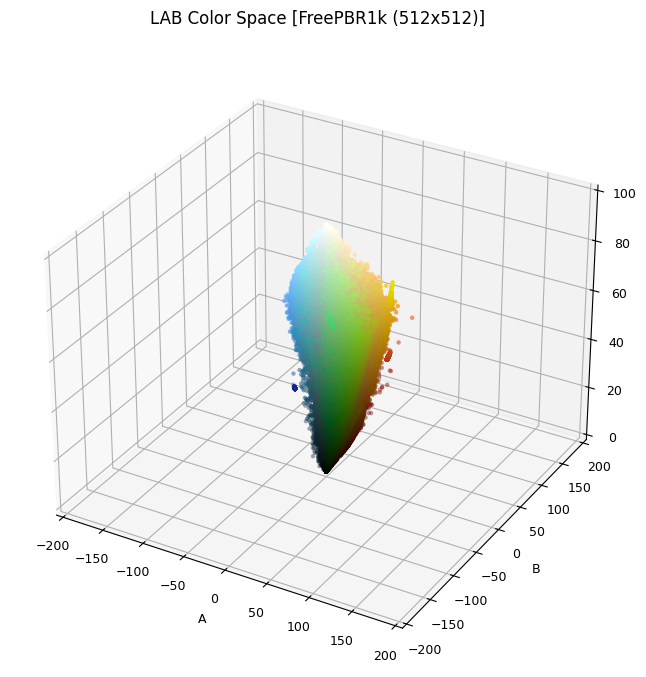

In [79]:
toLAB(rgb_values_array, 'LAB Color Space [FreePBR1k (512x512)]')

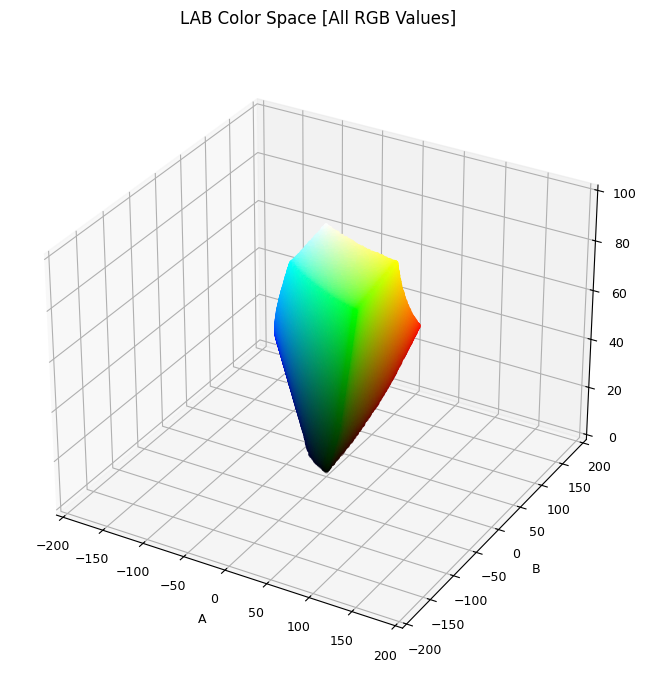

In [78]:
num_samples=1000000
random_rgb_values = np.random.rand(num_samples, 3)
toLAB(random_rgb_values, 'LAB Color Space [All RGB Values]')

C:\Users\Dennis\AppData\Local\Temp\ipykernel_29188\781071590.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(R, G, B, s=log_counts, c=df['Farbe'].apply(lambda x: np.array(x)/255).tolist(), cmap='viridis', alpha=0.6)


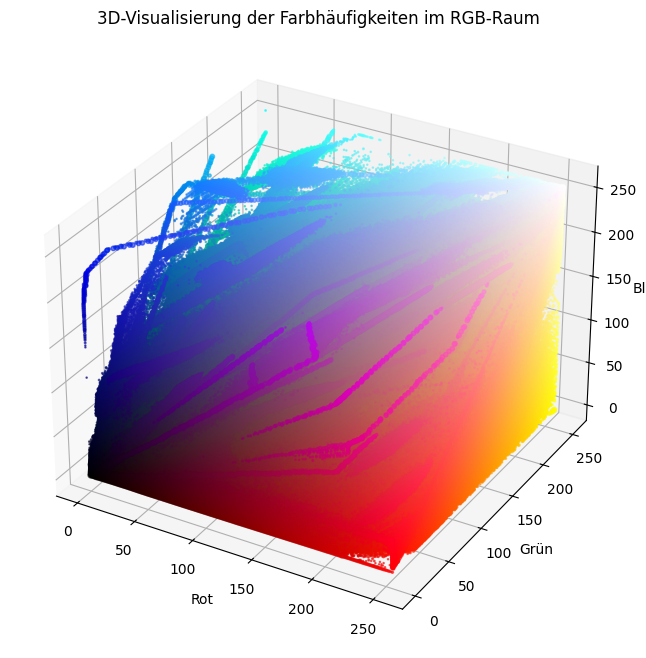

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

datasets = ["FreePBR", "Polyhaven", "Poliigon", "Minecraft_1024x", "CsGoFloor_1080x"]

for data in datasets:

    csv_file_path_sorted = f'output/dataSetAnalysis-{data}.csv'

    df = pd.read_csv(csv_file_path_sorted)

    df['Farbe'] = df['Farbe'].apply(lambda x: [int(val) for val in x.strip("()").split(",")])

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    R = df['Farbe'].apply(lambda x: x[0])
    G = df['Farbe'].apply(lambda x: x[1])
    B = df['Farbe'].apply(lambda x: x[2])

    log_counts = np.log(df['Anzahl'])


    sc = ax.scatter(R, G, B, s=log_counts, c=df['Farbe'].apply(lambda x: np.array(x)/255).tolist(), cmap='viridis', alpha=0.6)

    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.set_title(f'RGB Color Space [Dataset: {data}]')

    plt.show()


In [30]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

datasets = ["FreePBR", "Polyhaven", "Poliigon", "Minecraft_1024x", "CsGoFloor_1080x"]

for data in datasets:

    csv_file_path_sorted = f'output/dataSetAnalysis-{data}.csv'


    df = pd.read_csv(csv_file_path_sorted)

    df['Farbe'] = df['Farbe'].apply(lambda x: [int(val) for val in x.strip("()").split(",")])


    R = df['Farbe'].apply(lambda x: x[0])
    G = df['Farbe'].apply(lambda x: x[1])
    B = df['Farbe'].apply(lambda x: x[2])
    size = np.log(df['Anzahl']) * 20

    # Erstellen des 3D-Plots
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter-Plot
    sc = ax.scatter(R, G, B, s=size, c=df['Farbe'].apply(lambda x: np.array(x)/255).tolist(), alpha=0.6)

    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.set_title(f'3D-Visualization of color frequencies in RGB-space \n Dataset [{data}]')

    ax.view_init(elev=30, azim=-60 )

    # Animationsfunktion
    def update(frame):
        ax.view_init(elev=30, azim=frame)
        return sc,

    plt.savefig(f'output/{data}.png')

    ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 4), blit=True)

    ani.save(f'output/{data}.gif', writer='imagemagick')


KeyboardInterrupt: 

In [4]:
#combine all csv files into one
import pandas as pd
import glob

csv_files = glob.glob('~/pro/MasterThesis/code/dataAnalysis/output/*.csv')

combined_data = pd.DataFrame()


for file in csv_files:
    
    df = pd.read_csv(file, names=['Farbe', 'Anzahl'])
    
    
    df['Farbe'] = df['Farbe'].astype(str)
    df['Anzahl'] = pd.to_numeric(df['Anzahl'], errors='coerce').fillna(0).astype(int)
    
    if combined_data.empty:
        combined_data = df
    else:
        combined_data = pd.concat([combined_data, df])


combined_data = combined_data.groupby('Farbe', as_index=False).sum()

combined_data_sorted = combined_data.sort_values(by='Farbe').reset_index(drop=True)

combined_data_sorted.to_csv('output/dataSetAnalysis-combined.csv', index=False)

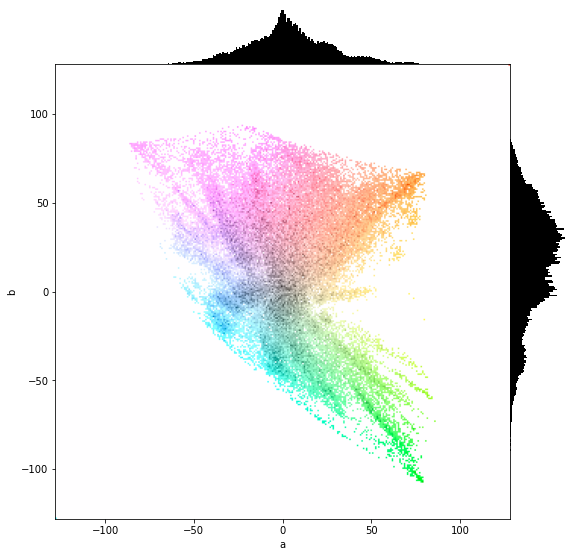

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import io, color
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os

plot_lim = 128


def plot_ab(df, bins=65, ax_main=None):
    plot_lim = 128
    
    if ax_main is None:
        fig, ax_main = plt.subplots(figsize=(8, 8))
    else:
        fig = ax_main.figure

    counts, y_edges, x_edges = np.histogram2d(df['b'], df['a'], bins=bins)
    x_centers = (x_edges[1:] + x_edges[:-1]) / 2
    y_centers = (y_edges[1:] + y_edges[:-1]) / 2
    ol = 100 - 80 * counts / counts.max()  # Lightness scaled for "beauty"
    oa, ob = np.meshgrid(x_centers, y_centers, indexing='ij')  # Adjust meshgrid indexing
    ol[counts == 0] = 100.0  # Mask areas with zero counts (white)
    oa[counts == 0] = 0.0
    ob[counts == 0] = 0.0
    lab = np.dstack((ol, oa, ob))
    rgb = color.lab2rgb(lab)  # LAB to RGB conversion
    
    ax_main.imshow(rgb, extent=(-plot_lim, plot_lim, -plot_lim, plot_lim), origin='lower')

    ax_main.set_xlabel("a")
    ax_main.set_ylabel("b")
    ax_main.set_xlim(-plot_lim, plot_lim)
    ax_main.set_ylim(-plot_lim, plot_lim)

    # Side histograms
    divider = make_axes_locatable(ax_main)
    ax_histx = divider.append_axes("top", 0.8, pad=0.0, sharex=ax_main)  # Set pad to 0
    ax_histy = divider.append_axes("right", 0.8, pad=0.0, sharey=ax_main)  # Set pad to 0

    ax_histx.hist(df['a'], bins=300, orientation='vertical', color='black', linewidth=0.1, weights=df['LogCount'])
    ax_histy.hist(df['b'], bins=300, orientation='horizontal', color='black', linewidth=0.1, weights=df['LogCount'])


    ax_histx.axis('off')
    ax_histy.axis('off')

    ax_histx.set_xlim(ax_main.get_xlim())

    plt.tight_layout()
    plt.show()

if os.name == 'posix':
    path = "/scratch/usr/nwmdgthk/dataAnalysisCSVData"
else:
    path = r"C:\Users\Dennis\Desktop\Pro\MasterThesis\code\dataAnalysis\tempOutput"


# datasets = ['Abzu_x512', 'BatmanArkhamKnight_x512', 'BioShockInf_x512', 'Borderlands_x512', 'Borderlands2_x512', 'BrothersATOTS_x512', 'CitiesSkylines_x512', 'CsGo_x512', 'Dauntless_x512', 'Dishonored_x512', 'Freepbr1k_x512', 'GarrysMod_x512', 'HalfLife2_x512', 'Left4Dead2_x512', 'Maneater_x512', 'Minecraft_x512', 'MutantYearZeroRTE_x512', 'OperatorNdmQG_x512', 'Phasmophobia_x512', 'Poliigon_x512', 'Polyhaven1k_x512', 'Portal_x512', 'Portal2_x512', 'Relicta_x512', 'RemnantFromTheAshes_x512', 'Ruiner_x512', 'StarWarsJFO_x512', 'TeamFortress2_x512', 'TrainSimWorld_x512', 'TrainSimWorld2_x512', 'UnityAssets_x512', 'Vampyr_x512', 'XCOM_x512', 'XCOM2_x512', 'AllData_x512']
datasets = ['Minecraft_x512']
for data_name in datasets:

    csv_file_path_sorted = os.path.join(path, f'dataSetAnalysis-{data_name}.csv')

    data = pd.read_csv(csv_file_path_sorted)
    df = pd.DataFrame(data)
    df = df.sample(frac=0.01, random_state=1)

    # Convert color strings to RGB tuples
    df['RGB'] = df['Color'].apply(lambda x: tuple(map(int, x.strip("()").split(", "))))

    # Convert from RGB to Lab color space
    df['Lab'] = df['RGB'].apply(lambda rgb: color.rgb2lab(np.array([[rgb]]) / 255)[0,0])

    df['a'] = df['Lab'].apply(lambda x: x[1])
    df['b'] = df['Lab'].apply(lambda x: x[2])

    new_row_df = pd.DataFrame([{'a': -plot_lim, 'b': -plot_lim, 'Count': 0}, {'a': plot_lim, 'b': plot_lim, 'Count': 0}]) 
    df = pd.concat([df, new_row_df], ignore_index=True)

    df['LogCount'] = np.log(df['Count'] +1).round().astype(int)

    plot_ab(df, bins=300)
    # plt.savefig(f'output/plot-{data_name}.png', dpi=300)


C:\Users\Dennis\AppData\Local\Temp\ipykernel_13756\762485530.py:28: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 16 negative Z values that have been clipped to zero
  rgb = color.lab2rgb(lab)


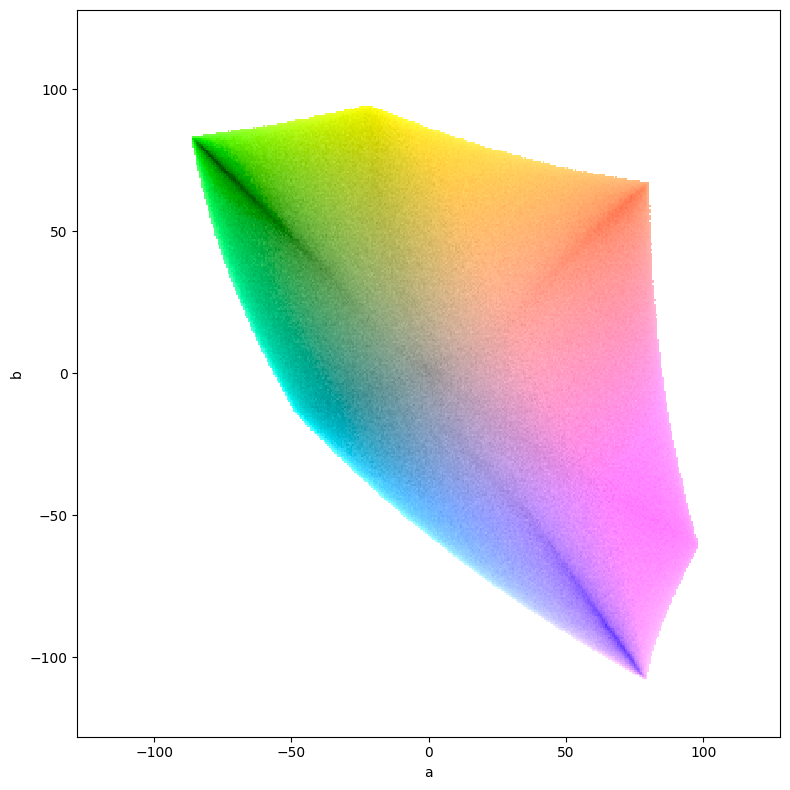

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from mpl_toolkits.axes_grid1 import make_axes_locatable

plot_lim = 128

def plot_ab_from_random_rgb(num_samples=10000000, bins=300):
    # Generate random RGB values
    random_rgb_values = np.random.rand(num_samples, 3) * 255  # Scale to 0-255

    # Convert from RGB to Lab color space directly
    lab_values = np.apply_along_axis(lambda row: color.rgb2lab([[row / 255]])[0, 0], 1, random_rgb_values)
    df = pd.DataFrame(lab_values, columns=['L', 'a', 'b'])

    # Plotting
    fig, ax_main = plt.subplots(figsize=(8, 8))
    counts, y_edges, x_edges = np.histogram2d(df['b'], df['a'], bins=bins)
    x_centers = (x_edges[1:] + x_edges[:-1]) / 2
    y_centers = (y_edges[1:] + y_edges[:-1]) / 2
    ol = 100 - 80 * counts / counts.max()  # Lightness scaled for "beauty"
    oa, ob = np.meshgrid(x_centers, y_centers)
    ol[counts == 0] = 100.0  # Mask areas with zero counts (white)
    oa[counts == 0] = 0.0
    ob[counts == 0] = 0.0
    lab = np.dstack((ol, oa, ob))
    rgb = color.lab2rgb(lab)
    ax_main.pcolormesh(x_edges, y_edges, rgb)
    ax_main.set_xlabel("a")
    ax_main.set_ylabel("b")
    ax_main.set_xlim(-plot_lim, plot_lim)
    ax_main.set_ylim(-plot_lim, plot_lim)

    plt.tight_layout()
    plt.show()

plot_ab_from_random_rgb()


In [12]:
from PIL import Image
import os

# Define your source and destination folders
source_folder = r'C:\Users\Dennis\Desktop\Pro\MasterThesis\code\dataAnalysis\plots\rgb'
destination_folder = r'C:\Users\Dennis\Desktop\Pro\MasterThesis\code\dataAnalysis\plots\rgb_crop'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Loop through all files in the source folder
for filename in os.listdir(source_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
        # Construct full file path
        file_path = os.path.join(source_folder, filename)
        try:
            # Open the image
            with Image.open(file_path) as img:
                cropped_img = img.crop((150, 100, img.width - 100, img.height - 50))
                
                # Save the cropped image to the destination folder
                cropped_img.save(os.path.join(destination_folder, filename))
                
                print(f"Processed and saved: {filename}")
                
        except Exception as e:
            print(f"Error processing {filename}: {e}")


All GIFs have been processed and saved to the target folder.


In [1]:
from PIL import Image, ImageSequence
import os
import numpy as np

def process_gif(source_path, target_path, fill_color=(255, 255, 255, 255)):
    # Open the source GIF
    with Image.open(source_path) as img:
        # Create a list to hold the processed frames
        frames = []
        # Loop through each frame in the animated GIF
        for frame in ImageSequence.Iterator(img):
            # Copy the frame to avoid altering the original image
            frame = frame.copy()
            # Convert to RGBA to handle transparency
            frame = frame.convert('RGBA')
            # Crop the top 300 pixels off
            cropped_frame = frame.crop((150, 100, frame.width - 100, frame.height - 50))
            # Create a new image with a solid background color, same size as the cropped frame
            new_frame = Image.new('RGBA', cropped_frame.size, fill_color)
            # Paste the cropped frame onto the new image to remove transparency
            new_frame.paste(cropped_frame, (0, 0), cropped_frame)
            # Convert back to RGB to ensure no transparency in final GIF
            new_frame = new_frame.convert('RGB')
            # Append the processed frame to our list
            frames.append(new_frame)
        
        # Save the frames as a new animated GIF
        frames[0].save(
            target_path,
            save_all=True,
            append_images=frames[1:],
            format='GIF',
            duration=img.info['duration'],
            loop=0,
        )

# Specify the source and target folders
source_folder = r'C:\Users\Dennis\Desktop\Pro\MasterThesis\code\dataAnalysis\plots\rgb_gif\crob'
target_folder = r'C:\Users\Dennis\Desktop\Pro\MasterThesis\code\dataAnalysis\plots\rgb_gif\crobcrob'

# Create the target folder if it does not exist
os.makedirs(target_folder, exist_ok=True)

# Loop through all files in the source folder
for file_name in os.listdir(source_folder):
    if file_name.endswith('.gif'):
        source_path = os.path.join(source_folder, file_name)
        target_path = os.path.join(target_folder, file_name)
        process_gif(source_path, target_path)

print("All animated GIFs have been processed and saved to the target folder.")


All animated GIFs have been processed and saved to the target folder.


In [2]:
import os
import csv

def rename_files_and_log(directory_path):
    # List all files in the given directory
    files = os.listdir(directory_path)
    
    # Sort files if you need them in a specific order
    files.sort()
    
    # Initialize the starting number for your numbering
    start_number = 1
    
    # Prepare a list to store the old and new names
    name_mapping = []
    
    # Loop through each file in the directory
    for file_name in files:
        # Construct the new file name
        # It assumes you want to keep the file's original extension
        file_extension = os.path.splitext(file_name)[1]
        new_name = f"labPlot_{start_number}{file_extension}"
        
        # Add the old and new name to the list
        name_mapping.append((file_name, new_name))
        
        # Construct the full old and new file paths
        old_file = os.path.join(directory_path, file_name)
        new_file = os.path.join(directory_path, new_name)
        
        # Rename the file
        os.rename(old_file, new_file)
        
        # Increment the numbering for the next file
        start_number += 1

    # Write the name mapping to a CSV file
    with open(os.path.join(directory_path, 'file_name_mapping_lab.csv'), mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['name', 'nr']) # Write the header
        writer.writerows(name_mapping) # Write the name mapping
    
    print("Files have been renamed and mapping saved to file_name_mapping.csv.")

# Usage
directory_path = r'C:\Users\Dennis\Desktop\Pro\MasterThesis\code\dataAnalysis\plots\rgb_gif'
rename_files_and_log(directory_path)


Files have been renamed and mapping saved to file_name_mapping.csv.
